Nombre total de répertoires par dossier :
AD : 454 répertoires, 22609 fichiers
CN : 480 répertoires, 19959 fichiers
MCI : 364 répertoires, 14511 fichiers

Total répertoires: 1298
Total fichiers: 57079


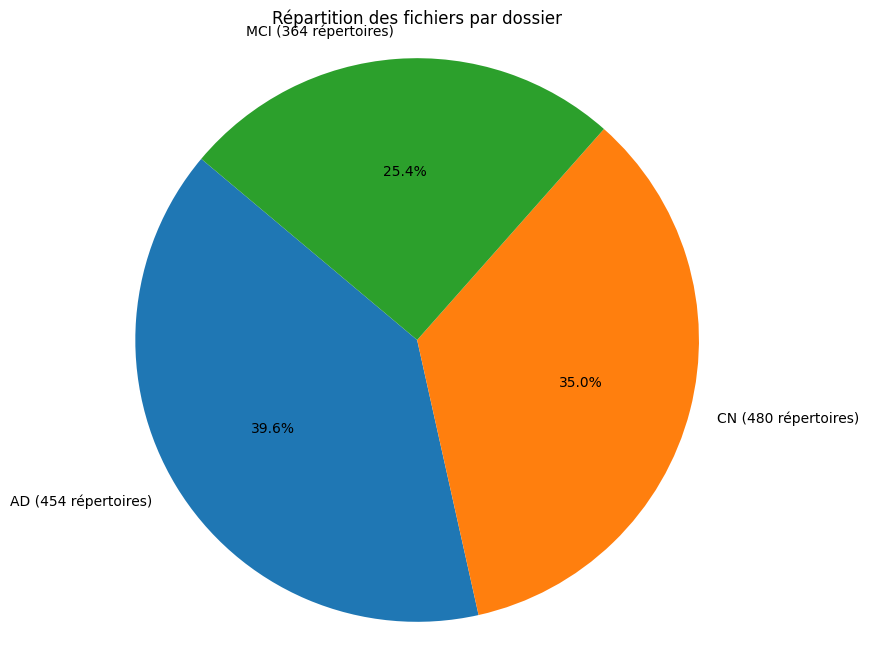

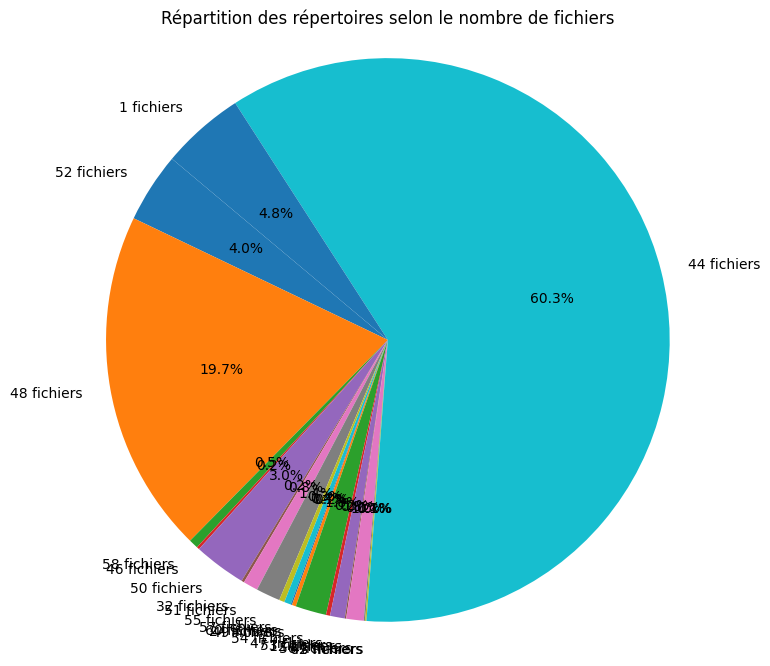

In [ ]:
import matplotlib.pyplot as plt


file_path = '/content/Nouveau document texte.txt'
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()


counts = {'AD': {'repertoires': 0, 'fichiers': 0},
          'CN': {'repertoires': 0, 'fichiers': 0},
          'MCI': {'repertoires': 0, 'fichiers': 0}}


for line in lines:
    if 'Répertoire:' in line:
        parts = line.split(',')
        dir_info = parts[0].split('/')
        folder = dir_info[3]  # 'AD', 'CN', 'MCI'
        file_count = int(parts[1].split(': ')[1])

        counts[folder]['repertoires'] += 1
        counts[folder]['fichiers'] += file_count


total_repertoires = sum(count['repertoires'] for count in counts.values())
total_fichiers = sum(count['fichiers'] for count in counts.values())


print("Nombre total de répertoires par dossier :")
for folder in counts:
    print(f"{folder} : {counts[folder]['repertoires']} répertoires, {counts[folder]['fichiers']} fichiers")

print(f"\nTotal répertoires: {total_repertoires}")
print(f"Total fichiers: {total_fichiers}")


labels = []
sizes = []
for folder in counts:
    labels.append(f"{folder} ({counts[folder]['repertoires']} répertoires)")
    sizes.append(counts[folder]['fichiers'])


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des fichiers par dossier')
plt.axis('equal')
plt.show()


file_count_distribution = {}

for line in lines:
    if 'Répertoire:' in line:
        file_count = int(line.split('Nombre de fichiers: ')[1])
        if file_count not in file_count_distribution:
            file_count_distribution[file_count] = 0
        file_count_distribution[file_count] += 1


labels = [f"{key} fichiers" for key in file_count_distribution]
sizes = [file_count_distribution[key] for key in file_count_distribution]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des répertoires selon le nombre de fichiers')
plt.axis('equal')
plt.show()


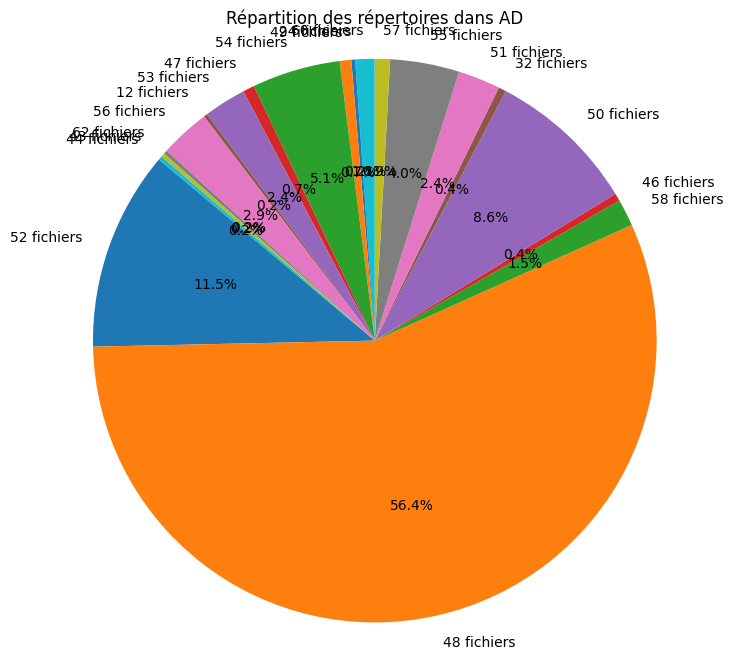

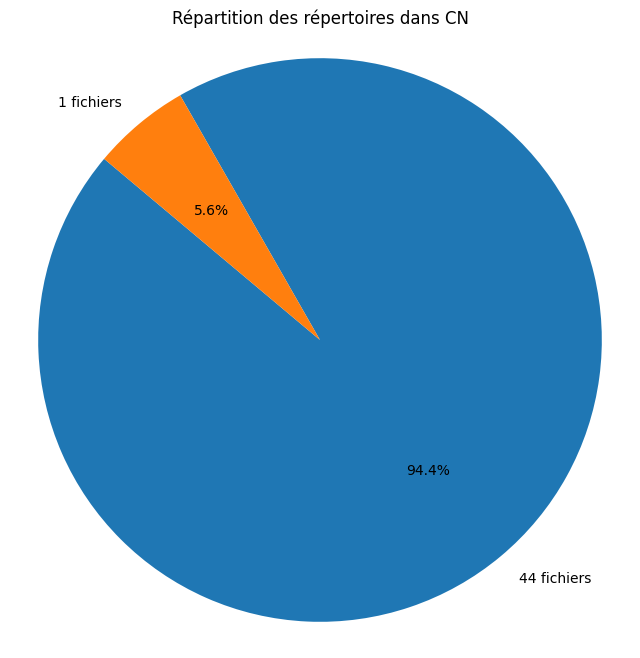

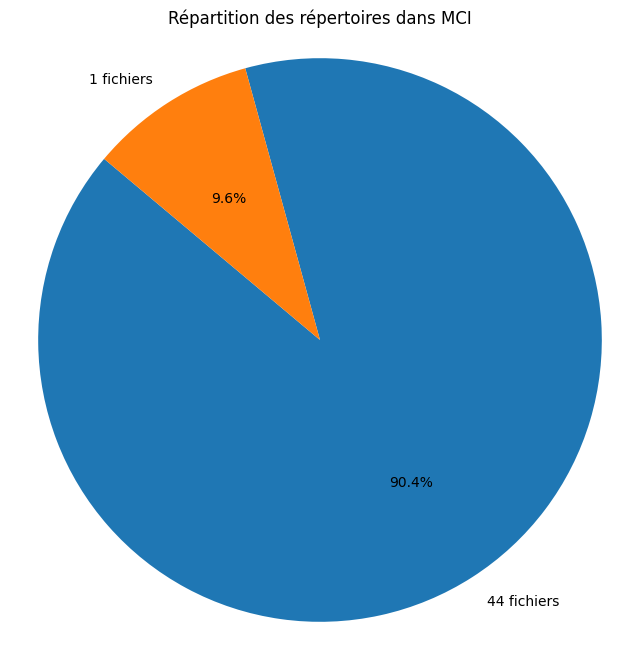

Nombre total de répertoires par dossier :
AD : 454 répertoires, 22609 fichiers
CN : 480 répertoires, 19959 fichiers
MCI : 364 répertoires, 14511 fichiers

Total répertoires: 1298
Total fichiers: 57079


In [ ]:
import matplotlib.pyplot as plt

file_path = '/content/Nouveau document texte.txt'
with open(file_path, 'r', encoding='latin1') as file:
    lines = file.readlines()

counts = {'AD': {'repertoires': 0, 'fichiers': 0, 'file_distribution': {}},
          'CN': {'repertoires': 0, 'fichiers': 0, 'file_distribution': {}},
          'MCI': {'repertoires': 0, 'fichiers': 0, 'file_distribution': {}}}


for line in lines:
    if 'Répertoire:' in line:
        parts = line.split(',')
        dir_info = parts[0].split('/')
        folder = dir_info[3]  # 'AD', 'CN', 'MCI'
        file_count = int(parts[1].split(': ')[1])

        counts[folder]['repertoires'] += 1
        counts[folder]['fichiers'] += file_count


        if file_count not in counts[folder]['file_distribution']:
            counts[folder]['file_distribution'][file_count] = 0
        counts[folder]['file_distribution'][file_count] += 1


for folder in counts:
    file_count_distribution = counts[folder]['file_distribution']
    labels = [f"{key} fichiers" for key in file_count_distribution]
    sizes = [file_count_distribution[key] for key in file_count_distribution]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Répartition des répertoires dans {folder}')
    plt.axis('equal')
    plt.show()


print("Nombre total de répertoires par dossier :")
for folder in counts:
    print(f"{folder} : {counts[folder]['repertoires']} répertoires, {counts[folder]['fichiers']} fichiers")

print(f"\nTotal répertoires: {sum(counts[folder]['repertoires'] for folder in counts)}")
print(f"Total fichiers: {sum(counts[folder]['fichiers'] for folder in counts)}")


###Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile

zip_path = '/content/drive/MyDrive/ADNI/PD T2/data.zip'
extract_path = '/content/data'  # Spécifiez le chemin où vous voulez extraire les fichiers

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


### Noir et bland

In [ ]:
import os
from PIL import Image


root_dir = '/content/data/AD'


for subdir, _, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        try:
            # Ouvrir l'image
            with Image.open(file_path) as img:
                # Convertir l'image en niveaux de gris
                img_gray = img.convert('L')

                # Redimensionner l'image
                img_resized = img_gray.resize((256, 256))

                # Sauvegarder l'image redimensionnée et convertie
                img_resized.save(file_path)

                # print(f'Image traitée et sauvegardée : {file_path}')
        except Exception as e:
            print(f'Erreur avec le fichier {file_path}: {e}')


In [ ]:
import os
from PIL import Image

# Chemin vers le dossier principal contenant les sous-dossiers d'images
root_dir = '/content/data/MCI'

# Parcourir tous les sous-dossiers et les fichiers
for subdir, _, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        try:
            # Ouvrir l'image
            with Image.open(file_path) as img:
                # Convertir l'image en niveaux de gris
                img_gray = img.convert('L')

                # Redimensionner l'image
                img_resized = img_gray.resize((256, 256))

                # Sauvegarder l'image redimensionnée et convertie
                img_resized.save(file_path)

                # print(f'Image traitée et sauvegardée : {file_path}')
        except Exception as e:
            print(f'Erreur avec le fichier {file_path}: {e}')


In [ ]:
from PIL import Image

def verifier_image(image_path):
    try:
        # Ouvrir l'image
        with Image.open(image_path) as img:
            # Afficher les informations de l'image
            print(f"Chemin de l'image : {image_path}")
            print(f"Dimensions de l'image : {img.size}")
            print(f"Mode de l'image : {img.mode}")  # 'L' pour niveaux de gris, 'RGB' pour couleur

            # Vérifier si l'image est en niveaux de gris
            if img.mode == 'L':
                print("L'image est en niveaux de gris.")
            else:
                print("L'image n'est pas en niveaux de gris.")

            # Vérifier le nombre de canaux
            num_channels = len(img.getbands())
            print(f"Nombre de canaux : {num_channels}")

    except Exception as e:
        print(f'Erreur lors de l\'ouverture de l\'image : {e}')

# Exemple d'utilisation
if __name__ == "__main__":
    # Chemin vers votre image
    chemin_image = '/content/data/CN/I10031/ADNI_007_S_0070_MR_Axial_PD_T2_FSE__br_raw_20060119120631463_92_S10953_I10031.png'

    # Appel de la fonction pour vérifier l'image
    verifier_image(chemin_image)


Chemin de l'image : /content/data/CN/I10031/ADNI_007_S_0070_MR_Axial_PD_T2_FSE__br_raw_20060119120631463_92_S10953_I10031.png
Dimensions de l'image : (256, 256)
Mode de l'image : L
L'image est en niveaux de gris.
Nombre de canaux : 1


### Filtre gaussien

In [ ]:
!rm -r /content/Gauss

In [ ]:
!mkdir /content/Gauss
!mkdir /content/Gauss/AD
!mkdir /content/Gauss/MCI
!mkdir /content/Gauss/CN

In [ ]:
import os
import cv2
import numpy as np

# Définir le chemin du dossier source et du dossier de destination
source_folder = '/content/data/AD'
destination_folder = '/content/Gauss/AD'

# Créer le dossier de destination s'il n'existe pas déjà
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Définir la matrice de convolution pour le filtre gaussien
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16

# Fonction pour appliquer le filtre gaussien sur une image
def apply_gaussian_filter(image_path, destination_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Erreur lors de la lecture de l'image {image_path}")
        return

    filtered_image = cv2.filter2D(image, -1, kernel)

    # Créer le sous-dossier de destination s'il n'existe pas déjà
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Enregistrer l'image filtrée
    cv2.imwrite(destination_path, filtered_image)

# Parcourir tous les sous-dossiers et images dans le dossier source
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Chemin complet de l'image source
            image_path = os.path.join(root, file)

            # Définir le chemin de l'image de destination en conservant la structure des sous-dossiers
            relative_path = os.path.relpath(root, source_folder)
            destination_path = os.path.join(destination_folder, relative_path, file)

            # Appliquer le filtre gaussien et enregistrer l'image dans le dossier de destination
            apply_gaussian_filter(image_path, destination_path)

print("Filtrage terminé.")


Filtrage terminé.


In [ ]:
import os
import cv2
import numpy as np

# Définir le chemin du dossier source et du dossier de destination
source_folder = '/content/data/CN'
destination_folder = '/content/Gauss/CN'

# Créer le dossier de destination s'il n'existe pas déjà
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Définir la matrice de convolution pour le filtre gaussien
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16

# Fonction pour appliquer le filtre gaussien sur une image
def apply_gaussian_filter(image_path, destination_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Erreur lors de la lecture de l'image {image_path}")
        return

    filtered_image = cv2.filter2D(image, -1, kernel)

    # Créer le sous-dossier de destination s'il n'existe pas déjà
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Enregistrer l'image filtrée
    cv2.imwrite(destination_path, filtered_image)

# Parcourir tous les sous-dossiers et images dans le dossier source
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Chemin complet de l'image source
            image_path = os.path.join(root, file)

            # Définir le chemin de l'image de destination en conservant la structure des sous-dossiers
            relative_path = os.path.relpath(root, source_folder)
            destination_path = os.path.join(destination_folder, relative_path, file)

            # Appliquer le filtre gaussien et enregistrer l'image dans le dossier de destination
            apply_gaussian_filter(image_path, destination_path)

print("Filtrage terminé.")


Filtrage terminé.


In [ ]:
import os
import cv2
import numpy as np

# Définir le chemin du dossier source et du dossier de destination
source_folder = '/content/data/MCI'
destination_folder = '/content/Gauss/MCI'

# Créer le dossier de destination s'il n'existe pas déjà
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Définir la matrice de convolution pour le filtre gaussien
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16

# Fonction pour appliquer le filtre gaussien sur une image
def apply_gaussian_filter(image_path, destination_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Erreur lors de la lecture de l'image {image_path}")
        return

    filtered_image = cv2.filter2D(image, -1, kernel)

    # Créer le sous-dossier de destination s'il n'existe pas déjà
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Enregistrer l'image filtrée
    cv2.imwrite(destination_path, filtered_image)

# Parcourir tous les sous-dossiers et images dans le dossier source
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Chemin complet de l'image source
            image_path = os.path.join(root, file)

            # Définir le chemin de l'image de destination en conservant la structure des sous-dossiers
            relative_path = os.path.relpath(root, source_folder)
            destination_path = os.path.join(destination_folder, relative_path, file)

            # Appliquer le filtre gaussien et enregistrer l'image dans le dossier de destination
            apply_gaussian_filter(image_path, destination_path)

print("Filtrage terminé.")


Filtrage terminé.


### compt

In [ ]:
import os

def compter_images_dans_dossiers(chemin):
    nombre_dossiers = 0
    total_images = 0
    details_dossiers = {}

    for dossier_racine, dossiers, fichiers in os.walk(chemin):
        # Ne compter que les dossiers directs (éviter les sous-dossiers)
        if dossier_racine == chemin:
            nombre_dossiers = len(dossiers)
            for dossier in dossiers:
                chemin_dossier = os.path.join(dossier_racine, dossier)
                images = [f for f in os.listdir(chemin_dossier) if os.path.isfile(os.path.join(chemin_dossier, f))]
                nombre_images = len(images)
                details_dossiers[dossier] = nombre_images
                total_images += nombre_images

    return nombre_dossiers, details_dossiers, total_images

# Spécifiez le chemin de votre dossier principal ici
chemin_dossier_principal = "/content/Gauss/AD"

nombre_dossiers, details_dossiers, total_images = compter_images_dans_dossiers(chemin_dossier_principal)

print(f"Nombre de dossiers: {nombre_dossiers}")
for dossier, nombre_images in details_dossiers.items():
    print(f"Dossier '{dossier}' contient {nombre_images} images")
print(f"Nombre total d'images: {total_images}")


Nombre de dossiers: 454
Dossier 'I73313' contient 50 images
Dossier 'I58759' contient 48 images
Dossier 'I136938' contient 55 images
Dossier 'I97655' contient 48 images
Dossier 'I57567' contient 52 images
Dossier 'I27784' contient 52 images
Dossier 'I85346' contient 48 images
Dossier 'I78252' contient 48 images
Dossier 'I74389' contient 48 images
Dossier 'I29231' contient 48 images
Dossier 'I88806' contient 48 images
Dossier 'I141912' contient 52 images
Dossier 'I58970' contient 52 images
Dossier 'I104001' contient 52 images
Dossier 'I37147' contient 50 images
Dossier 'I48632' contient 50 images
Dossier 'I25954' contient 48 images
Dossier 'I29238' contient 51 images
Dossier 'I50699' contient 48 images
Dossier 'I44826' contient 48 images
Dossier 'I25985' contient 48 images
Dossier 'I30529' contient 48 images
Dossier 'I435636' contient 58 images
Dossier 'I126022' contient 56 images
Dossier 'I30128' contient 54 images
Dossier 'I25776' contient 54 images
Dossier 'I71770' contient 50 images

### Voxel

In [ ]:
!rm -r /content/Voxel

In [ ]:
!pip install numpy nibabel opencv-python


In [ ]:
import os
import numpy as np
import nibabel as nib
import cv2

def lire_images_dans_dossier(chemin_dossier):
    images = []
    for nom_fichier in sorted(os.listdir(chemin_dossier)):
        chemin_fichier = os.path.join(chemin_dossier, nom_fichier)
        if os.path.isfile(chemin_fichier) and nom_fichier.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image = cv2.imread(chemin_fichier, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
    return np.stack(images, axis=0)

def convertir_en_nii(chemin_principal, chemin_sortie):
    if not os.path.exists(chemin_sortie):
        os.makedirs(chemin_sortie)

    for nom_dossier in os.listdir(chemin_principal):
        chemin_dossier = os.path.join(chemin_principal, nom_dossier)
        if os.path.isdir(chemin_dossier):
            images = lire_images_dans_dossier(chemin_dossier)
            fichier_nii = os.path.join(chemin_sortie, f"{nom_dossier}.nii.gz")
            img_nifti = nib.Nifti1Image(images, np.eye(4))
            nib.save(img_nifti, fichier_nii)
            # print(f"Le dossier '{nom_dossier}' a été converti en fichier NIfTI '{fichier_nii}'.")


chemin_dossier_principal = "/content/Gauss/AD"
chemin_dossier_sortie = "/content/Voxel/AD"


convertir_en_nii(chemin_dossier_principal, chemin_dossier_sortie)


In [ ]:
import os
import numpy as np
import nibabel as nib
import cv2  # OpenCV pour lire les images

def lire_images_dans_dossier(chemin_dossier):
    images = []
    for nom_fichier in sorted(os.listdir(chemin_dossier)):
        chemin_fichier = os.path.join(chemin_dossier, nom_fichier)
        if os.path.isfile(chemin_fichier) and nom_fichier.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image = cv2.imread(chemin_fichier, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
    return np.stack(images, axis=0)

def convertir_en_nii(chemin_principal, chemin_sortie):
    if not os.path.exists(chemin_sortie):
        os.makedirs(chemin_sortie)

    for nom_dossier in os.listdir(chemin_principal):
        chemin_dossier = os.path.join(chemin_principal, nom_dossier)
        if os.path.isdir(chemin_dossier):
            images = lire_images_dans_dossier(chemin_dossier)
            fichier_nii = os.path.join(chemin_sortie, f"{nom_dossier}.nii.gz")
            img_nifti = nib.Nifti1Image(images, np.eye(4))
            nib.save(img_nifti, fichier_nii)
            # print(f"Le dossier '{nom_dossier}' a été converti en fichier NIfTI '{fichier_nii}'.")


chemin_dossier_principal = "/content/Gauss/CN"
chemin_dossier_sortie = "/content/Voxel/CN"


convertir_en_nii(chemin_dossier_principal, chemin_dossier_sortie)


In [ ]:
import os
import numpy as np
import nibabel as nib
import cv2  # OpenCV pour lire les images

def lire_images_dans_dossier(chemin_dossier):
    images = []
    for nom_fichier in sorted(os.listdir(chemin_dossier)):
        chemin_fichier = os.path.join(chemin_dossier, nom_fichier)
        if os.path.isfile(chemin_fichier) and nom_fichier.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image = cv2.imread(chemin_fichier, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
    return np.stack(images, axis=0)

def convertir_en_nii(chemin_principal, chemin_sortie):
    if not os.path.exists(chemin_sortie):
        os.makedirs(chemin_sortie)

    for nom_dossier in os.listdir(chemin_principal):
        chemin_dossier = os.path.join(chemin_principal, nom_dossier)
        if os.path.isdir(chemin_dossier):
            images = lire_images_dans_dossier(chemin_dossier)
            fichier_nii = os.path.join(chemin_sortie, f"{nom_dossier}.nii.gz")
            img_nifti = nib.Nifti1Image(images, np.eye(4))
            nib.save(img_nifti, fichier_nii)
            # print(f"Le dossier '{nom_dossier}' a été converti en fichier NIfTI '{fichier_nii}'.")


chemin_dossier_principal = "/content/Gauss/MCI"
chemin_dossier_sortie = "/content/Voxel/MCI"


convertir_en_nii(chemin_dossier_principal, chemin_dossier_sortie)


In [ ]:
!pip install numpy nibabel matplotlib


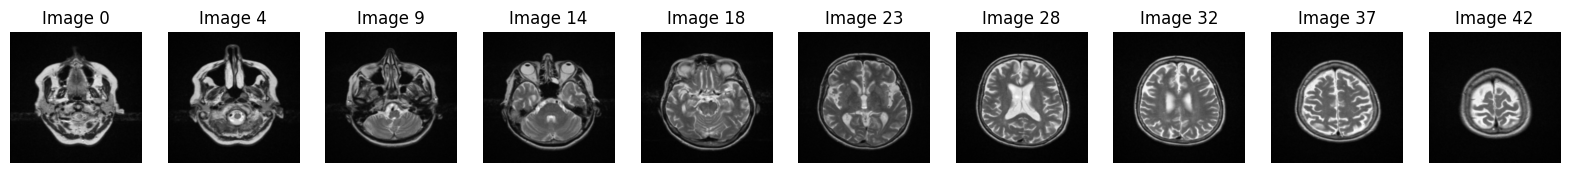

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def afficher_images_nii(fichier_nii, nombre_images_a_afficher=10):
    img_nifti = nib.load(fichier_nii)
    data = img_nifti.get_fdata()

    # Afficher quelques images du volume
    fig, axes = plt.subplots(1, nombre_images_a_afficher, figsize=(20, 4))
    indices = np.linspace(0, data.shape[0] - 1, nombre_images_a_afficher).astype(int)

    for i, ax in enumerate(axes):
        ax.imshow(data[indices[i]], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Image {indices[i]}')

    plt.show()

# Spécifiez le chemin de votre fichier NIfTI ici
fichier_nii = "/content/Voxel/AD/I100111.nii.gz"

afficher_images_nii(fichier_nii)


### Décapage de crane

In [ ]:
!rm -r /content/skull

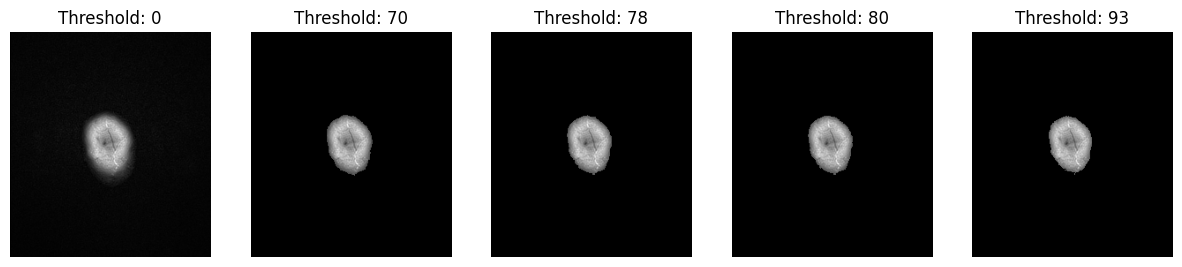

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour le décapage du crâne utilisant OpenCV
def skull_stripping(image_path, threshold_value):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Erreur: l'image à {image_path} n'a pas pu être chargée.")
        return None

    # Appliquer un seuillage manuel pour créer un masque
    _, mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Trouver les contours et sélectionner le plus grand
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        print(f"Erreur: aucun contour trouvé dans l'image {image_path}.")
        return None

    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    largest_contour = contours[0]

    # Créer un masque vide et dessiner le contour du crâne
    skull_mask = np.zeros_like(mask)
    cv2.drawContours(skull_mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

    # Appliquer le masque sur l'image originale
    stripped_image = cv2.bitwise_and(image, image, mask=skull_mask)

    return stripped_image

# Chemin de l'image à tester
image_path = "/content/data/AD/I102272/ADNI_057_S_1373_MR_Axial_PD-T2_TSE__br_raw_20080411141621953_90_S48645_I102272.png"  # Remplacez par le chemin de votre image

# Liste des valeurs de seuil à tester
threshold_values = [0, 70, 78, 80, 93]

# Créer une figure pour afficher les résultats
plt.figure(figsize=(15, 10))

# Parcourir et tester chaque valeur de seuil
for i, threshold_value in enumerate(threshold_values):
    stripped_image = skull_stripping(image_path, threshold_value)

    if stripped_image is not None:
        # Ajouter un subplot pour chaque résultat
        plt.subplot(1, len(threshold_values), i + 1)
        plt.imshow(stripped_image, cmap='gray')
        plt.title(f'Threshold: {threshold_value}')
        plt.axis('off')

# Afficher les résultats
plt.show()


#### 1)

In [ ]:
import os
from pathlib import Path
import cv2
import numpy as np

# Fonction pour le décapage du crâne utilisant OpenCV
def skull_stripping(image_path):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer un seuillage pour créer un masque
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Trouver les contours et sélectionner le plus grand
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Créer un masque vide et dessiner le contour du crâne
    skull_mask = np.zeros_like(mask)
    cv2.drawContours(skull_mask, [contours[0]], -1, (255), thickness=cv2.FILLED)

    # Appliquer le masque sur l'image originale
    stripped_image = cv2.bitwise_and(image, image, mask=skull_mask)

    return stripped_image

input_dir = Path("/content/Gauss/AD")
output_dir = Path("/content/skull/AD")

# Créer l'arborescence des dossiers de sortie si elle n'existe pas
output_dir.mkdir(parents=True, exist_ok=True)

# Parcourir tous les sous-dossiers et fichiers
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):  # Ajoutez d'autres extensions si nécessaire
            image_path = Path(root) / file
            relative_path = image_path.relative_to(input_dir)
            output_path = output_dir / relative_path

            # Créer les sous-dossiers de sortie si nécessaire
            output_path.parent.mkdir(parents=True, exist_ok=True)

            # Appliquer l'algorithme de décapage du crâne
            stripped_image = skull_stripping(str(image_path))

            # Sauvegarder l'image décapée
            cv2.imwrite(str(output_path), stripped_image)


KeyboardInterrupt: 

In [ ]:
import os
from pathlib import Path
import cv2
import numpy as np

# Fonction pour le décapage du crâne utilisant OpenCV
def skull_stripping(image_path):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer un seuillage pour créer un masque
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Trouver les contours et sélectionner le plus grand
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Créer un masque vide et dessiner le contour du crâne
    skull_mask = np.zeros_like(mask)
    cv2.drawContours(skull_mask, [contours[0]], -1, (255), thickness=cv2.FILLED)

    # Appliquer le masque sur l'image originale
    stripped_image = cv2.bitwise_and(image, image, mask=skull_mask)

    return stripped_image

input_dir = Path("/content/Gauss/CN")
output_dir = Path("/content/skull/CN")

# Créer l'arborescence des dossiers de sortie si elle n'existe pas
output_dir.mkdir(parents=True, exist_ok=True)

# Parcourir tous les sous-dossiers et fichiers
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):  # Ajoutez d'autres extensions si nécessaire
            image_path = Path(root) / file
            relative_path = image_path.relative_to(input_dir)
            output_path = output_dir / relative_path

            # Créer les sous-dossiers de sortie si nécessaire
            output_path.parent.mkdir(parents=True, exist_ok=True)

            # Appliquer l'algorithme de décapage du crâne
            stripped_image = skull_stripping(str(image_path))

            # Sauvegarder l'image décapée
            cv2.imwrite(str(output_path), stripped_image)


In [ ]:
import os
from pathlib import Path
import cv2
import numpy as np

# Fonction pour le décapage du crâne utilisant OpenCV
def skull_stripping(image_path):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer un seuillage pour créer un masque
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Trouver les contours et sélectionner le plus grand
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Créer un masque vide et dessiner le contour du crâne
    skull_mask = np.zeros_like(mask)
    cv2.drawContours(skull_mask, [contours[0]], -1, (255), thickness=cv2.FILLED)

    # Appliquer le masque sur l'image originale
    stripped_image = cv2.bitwise_and(image, image, mask=skull_mask)

    return stripped_image

input_dir = Path("/content/data/MCI")
output_dir = Path("/content/skull/MCI")

# Créer l'arborescence des dossiers de sortie si elle n'existe pas
output_dir.mkdir(parents=True, exist_ok=True)

# Parcourir tous les sous-dossiers et fichiers
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):  # Ajoutez d'autres extensions si nécessaire
            image_path = Path(root) / file
            relative_path = image_path.relative_to(input_dir)
            output_path = output_dir / relative_path

            # Créer les sous-dossiers de sortie si nécessaire
            output_path.parent.mkdir(parents=True, exist_ok=True)

            # Appliquer l'algorithme de décapage du crâne
            stripped_image = skull_stripping(str(image_path))

            # Sauvegarder l'image décapée
            cv2.imwrite(str(output_path), stripped_image)


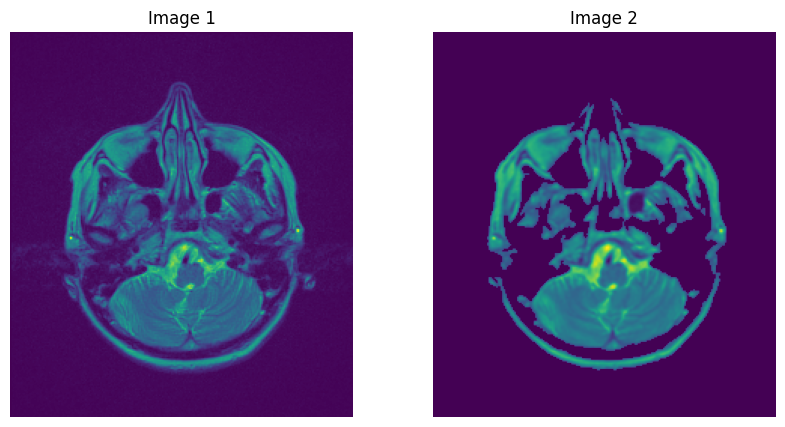

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger les images
image1 = mpimg.imread('/content/data/AD/I100111/ADNI_023_S_1262_MR_Axial_PD-T2_TSE__br_raw_20080402105254015_58_S47811_I100111.png')
image2 = mpimg.imread('/content/skull/AD3/I100111/ADNI_023_S_1262_MR_Axial_PD-T2_TSE__br_raw_20080402105254015_58_S47811_I100111.png')

# Créer une figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Afficher la première image
ax1.imshow(image1)
ax1.set_title('Image 1')
ax1.axis('off')  # Cacher les axes

# Afficher la deuxième image
ax2.imshow(image2)
ax2.set_title('Image 2')
ax2.axis('off')  # Cacher les axes

# Afficher la figure
plt.show()


###tri

In [ ]:
import os
import re

# Chemin du dossier contenant les répertoires
main_directory = "/content/Gauss/AD"

# Expression régulière pour extraire le numéro séquentiel
expression = re.compile(r'_(\d{1,2,3})_S')

def rename_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            match = expression.search(filename)
            if match:
                seq_num = match.group(1)
                new_name = f"{seq_num}.png"
                old_path = os.path.join(directory, filename)
                new_path = os.path.join(directory, new_name)
                os.rename(old_path, new_path)
                # print(f"Renamed {filename} to {new_name}")

for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)
    if os.path.isdir(subdir_path):
        rename_images_in_directory(subdir_path)


In [ ]:
import os
import re

# Chemin du dossier contenant les répertoires
main_directory = "/content/Gauss/CN"

# Expression régulière pour extraire le numéro séquentiel
expression = re.compile(r'_(\d{3})_S')

def rename_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            match = expression.search(filename)
            if match:
                seq_num = match.group(1)
                new_name = f"{seq_num}.png"
                old_path = os.path.join(directory, filename)
                new_path = os.path.join(directory, new_name)
                os.rename(old_path, new_path)
                # print(f"Renamed {filename} to {new_name}")

for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)
    if os.path.isdir(subdir_path):
        rename_images_in_directory(subdir_path)


In [ ]:
import os
import re

# Chemin du dossier contenant les répertoires
main_directory = "/content/Gauss/MCI"

# Expression régulière pour extraire le numéro séquentiel
expression = re.compile(r'_(\d{3})_S')

def rename_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            match = expression.search(filename)
            if match:
                seq_num = match.group(1)
                new_name = f"{seq_num}.png"
                old_path = os.path.join(directory, filename)
                new_path = os.path.join(directory, new_name)
                os.rename(old_path, new_path)
                # print(f"Renamed {filename} to {new_name}")

for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)
    if os.path.isdir(subdir_path):
        rename_images_in_directory(subdir_path)


### voxel

In [ ]:
!mkdir /content/voxel

In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/Gauss/AD'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/AD'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/Gauss/CN'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/CN'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder), key=lambda x: int(x.split('.')[0])):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

def create_voxel_from_images(images):
    voxel_data = np.stack(images, axis=-1)
    return voxel_data

def save_voxel_as_nifti(voxel_data, output_path):
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(voxel_data, affine)
    nib.save(nifti_img, output_path)

def process_subfolders(main_folder, output_folder):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = load_images_from_folder(subfolder_path)
            voxel_data = create_voxel_from_images(images)
            output_path = os.path.join(output_folder, f"{subfolder}.nii.gz")
            save_voxel_as_nifti(voxel_data, output_path)

# Chemin vers le dossier principal contenant les sous-dossiers
main_folder = '/content/Gauss/MCI'

# Chemin vers le dossier où enregistrer les voxels
output_folder = '/content/voxel/MCI'

# Traiter les sous-dossiers et enregistrer les voxels
process_subfolders(main_folder, output_folder)


## save zip

In [ ]:
from google.colab import drive
import shutil
import os
# Chemin du dossier à compresser
folder_to_zip = '/content/Voxel'

# Chemin où le fichier ZIP sera sauvegardé
zip_output_path = '/content/voxel2.zip'

# Créer le fichier ZIP
shutil.make_archive('/content/voxel2', 'zip', folder_to_zip)


drive_output_path = '/content/drive/MyDrive/ADNI/PD T2/voxel2.zip'

shutil.move(zip_output_path, drive_output_path)

'/content/drive/MyDrive/ADNI/PD T2/voxel2.zip'